In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Shrushti\Desktop\datasets excel\airline_passenger_satisfaction.csv")

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [11]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [5]:
print(df.isnull().sum())

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [5]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

ID                                        0.000000
Gender                                    0.000000
Age                                       0.000000
Customer Type                             0.000000
Type of Travel                            0.000000
Class                                     0.000000
Flight Distance                           0.000000
Departure Delay                           0.000000
Arrival Delay                             0.302587
Departure and Arrival Time Convenience    0.000000
Ease of Online Booking                    0.000000
Check-in Service                          0.000000
Online Boarding                           0.000000
Gate Location                             0.000000
On-board Service                          0.000000
Seat Comfort                              0.000000
Leg Room Service                          0.000000
Cleanliness                               0.000000
Food and Drink                            0.000000
In-flight Service              

In [12]:
df['Arrival Delay'].dropna()

0          5.0
1         39.0
2          0.0
3          0.0
4          1.0
          ... 
129875     3.0
129876     0.0
129877    14.0
129878    22.0
129879     0.0
Name: Arrival Delay, Length: 129880, dtype: float64

In [13]:
duplicate_ids = df.duplicated(subset='ID', keep=False).sum()
print(duplicate_ids)

0


About the dataset

The dataset is from a survey done by an airline to see how satisfied passengers are with their services. By looking at things like age, type of travel, and satisfaction ratings, the airline can figure out what they're doing well and where they need to make improvements. The survey covers stuff like online booking, check-in, leg room, cleanliness, food and beverage, how good the in-flight services are. The data helps the airline make changes to make sure passengers have a better overall experience when they travel.

Data Size: 129880 rows, 23 columns
Null Values: Only one column consisted null valaues ie Arrival Delay with 0.3% of null values which is very less. We could have deleted rows.


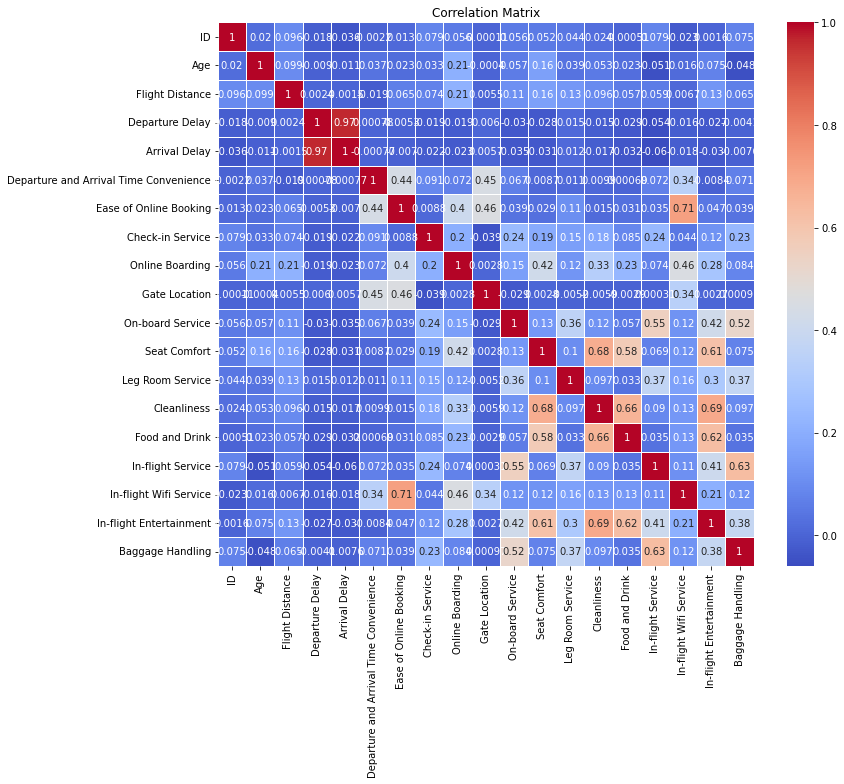

In [17]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

EDA

In [14]:
gender_class_table = df.groupby(['Class','Type of Travel', 'Gender']).size().unstack()
gender_class_table

Gender                       Female   Male
Class        Type of Travel               
Business     Business         29940  29547
             Personal          1323   1350
Economy      Business         13168  12136
             Personal         16502  16503
Economy Plus Business          2686   2216
             Personal          2280   2229

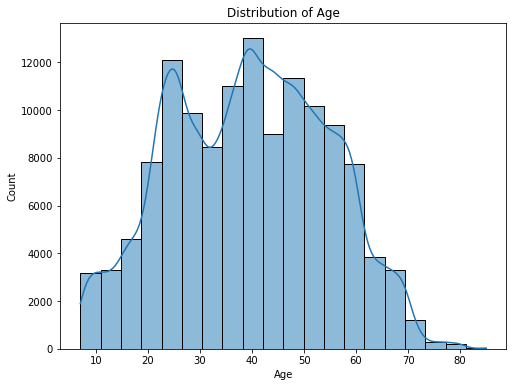

In [9]:
#Distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

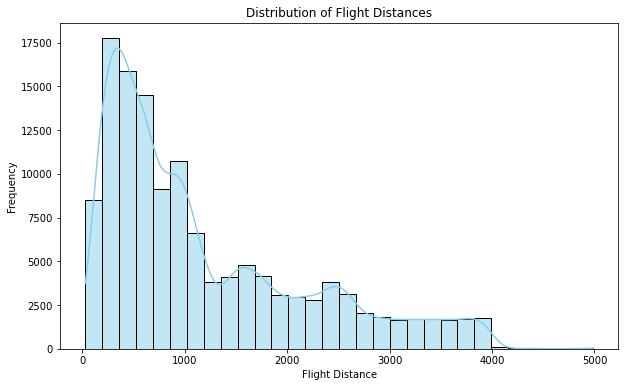

In [18]:
#distribution of flight distance
flight_distances = df['Flight Distance']

plt.figure(figsize=(10, 6))
sns.histplot(flight_distances, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Flight Distances')
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')
plt.show()


In [20]:
#Distribution of flight distance by satisfaction

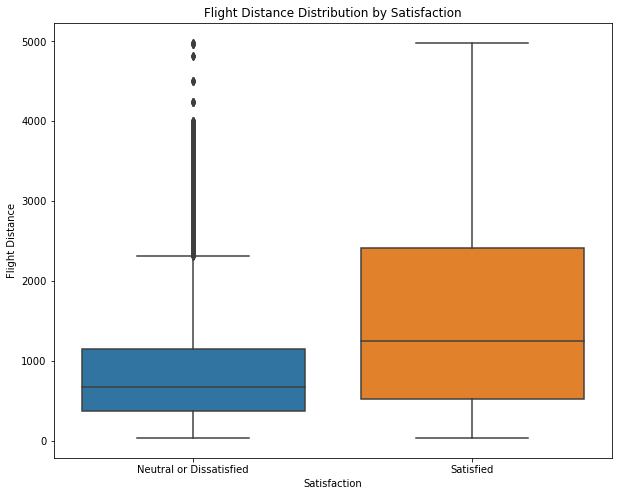

In [19]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Satisfaction', y='Flight Distance', data=df)
plt.title('Flight Distance Distribution by Satisfaction')
plt.show()

What is the distribution of satisfaction ratings across different classes in the airline dataset, reveal about passenger experiences?


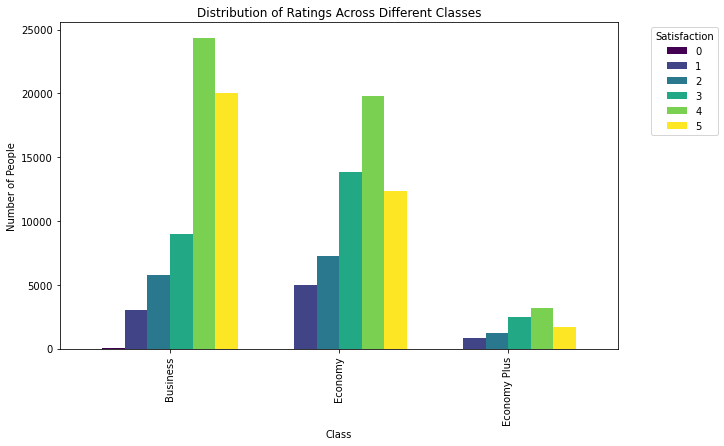

In [45]:

rating_counts = df.groupby(['Class', 'In-flight Service']).size().unstack()

fig, ax = plt.subplots(figsize=(10, 6))
rating_counts.plot(kind='bar', ax=ax, colormap='viridis', width=0.8)
ax.set_title('Distribution of Ratings Across Different Classes')
ax.set_xlabel('Class')
ax.set_ylabel('Number of People')
ax.legend(title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


What are satisfaction ratings amoung different classes about cleanliness?

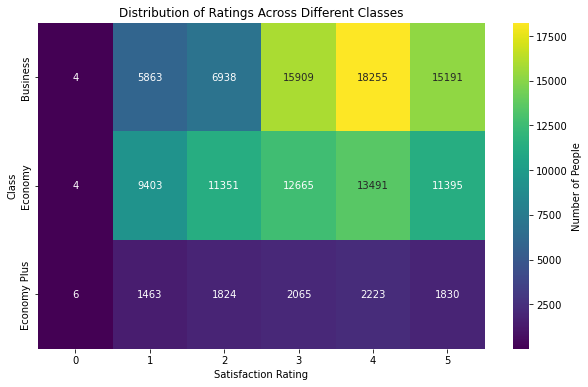

In [41]:
heatmap_data = df.groupby(['Class', 'Cleanliness']).size().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='g', cbar_kws={'label': 'Number of People'})
plt.title('Distribution of Ratings Across Different Classes')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Class')
plt.show()



What are satisfaction ratings amoung different classes about food?

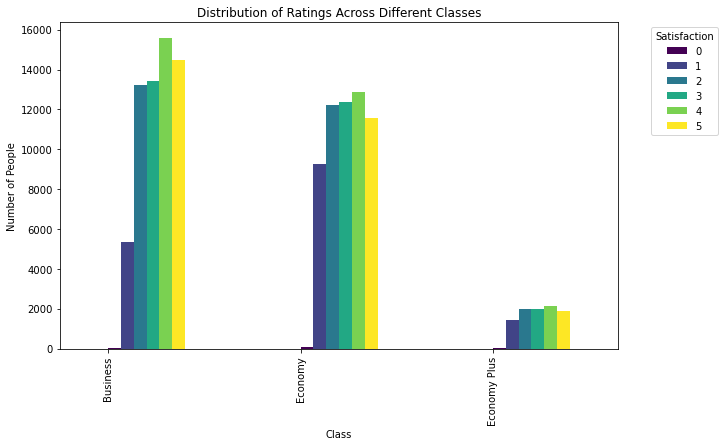

In [44]:
rating_counts = df.groupby(['Class', 'Food and Drink']).size().unstack()


fig, ax = plt.subplots(figsize=(10, 6))
rating_counts.plot(kind='bar', ax=ax, colormap='viridis', position=0, width=0.4, label='Rating')
ax.set_title('Distribution of Ratings Across Different Classes')
ax.set_xlabel('Class')
ax.set_ylabel('Number of People')
ax.legend(title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [22]:
#Distribution of satisfaction ratings for Seat Comfort across varying flight distances

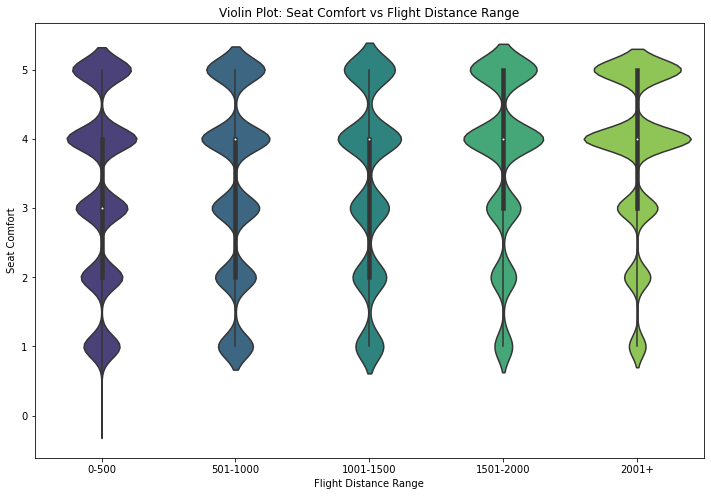

In [51]:
df['Flight Distance Range'] = pd.cut(df['Flight Distance'], bins=[0, 500, 1000, 1500, 2000, float('inf')],
                                     labels=['0-500', '501-1000', '1001-1500', '1501-2000', '2001+'])

plt.figure(figsize=(12, 8))
sns.violinplot(x='Flight Distance Range', y='Seat Comfort', data=df, palette='viridis')

plt.title('Violin Plot: Seat Comfort vs Flight Distance Range')
plt.xlabel('Flight Distance Range')
plt.ylabel('Seat Comfort')
plt.show()

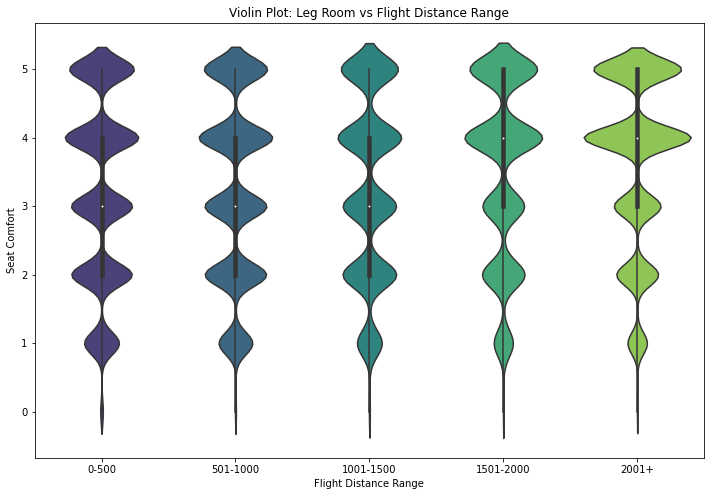

In [23]:
df['Flight Distance Range'] = pd.cut(df['Flight Distance'], bins=[0, 500, 1000, 1500, 2000, float('inf')],
                                     labels=['0-500', '501-1000', '1001-1500', '1501-2000', '2001+'])

# Plotting
plt.figure(figsize=(12, 8))
sns.violinplot(x='Flight Distance Range', y='Leg Room Service', data=df, palette='viridis')

plt.title('Violin Plot: Leg Room vs Flight Distance Range')
plt.xlabel('Flight Distance Range')
plt.ylabel('Seat Comfort')
plt.show()

In [ ]:
#Distribution of Gate Location Rating By Age Group


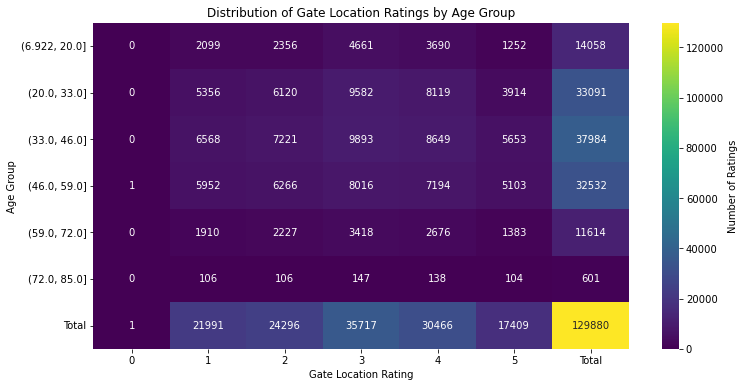

In [29]:
df['Age Group'] = pd.cut(df['Age'], bins=6)

plt.figure(figsize=(12, 6))
conditional_table = pd.crosstab(df['Age Group'], df['Gate Location'], margins=True, margins_name="Total")

sns.heatmap(conditional_table, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Number of Ratings'})

plt.title('Distribution of Gate Location Ratings by Age Group')
plt.xlabel('Gate Location Rating')
plt.ylabel('Age Group')
plt.show()

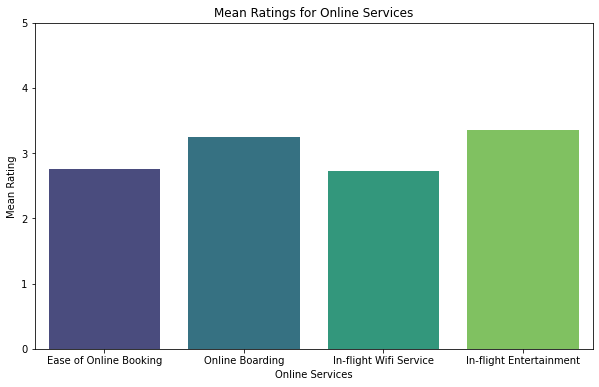

In [71]:

services_columns = ['Ease of Online Booking', 'Online Boarding', 'In-flight Wifi Service', 'In-flight Entertainment']
services_df = df[services_columns]
mean_ratings = services_df.mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_ratings.index, y=mean_ratings.values, palette='viridis')
plt.title('Mean Ratings for Online Services')
plt.xlabel('Online Services')
plt.ylabel('Mean Rating')
plt.ylim(0, 5)  # Set y-axis limits to represent ratings from 0 to 5
plt.show()

In [39]:
#Mean and median ratings of different services 

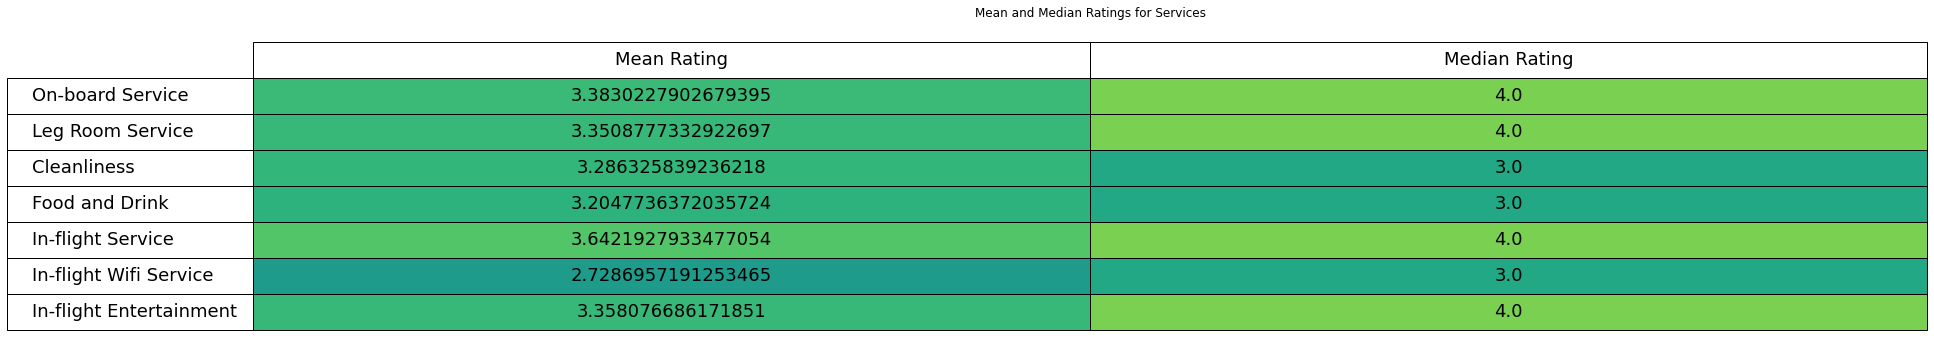

In [38]:

services_columns = ['On-board Service', 'Leg Room Service', 'Cleanliness', 'Food and Drink',
                     'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment']

mean_ratings = df[services_columns].mean()
median_ratings = df[services_columns].median()

ratings_df = pd.DataFrame({'Mean Rating': mean_ratings, 'Median Rating': median_ratings})

cmap = plt.cm.viridis

fig, ax = plt.subplots(figsize=(10, 6))
table = ax.table(cellText=ratings_df.values,
                 colLabels=ratings_df.columns,
                 rowLabels=ratings_df.index,
                 cellLoc='center',
                 loc='center')

for i, key in enumerate(ratings_df.index):
    for j, value in enumerate(ratings_df.columns):
        cell_value = ratings_df.at[key, value]
        table[(i + 1, j)].set_facecolor(cmap(cell_value / 5))

table.auto_set_font_size(False)
table.set_fontsize(18)
table.scale(3, 3)

ax.axis('off') 
plt.title('Mean and Median Ratings for Services')
plt.show()

KeyError: "['Total'] not found in axis"

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

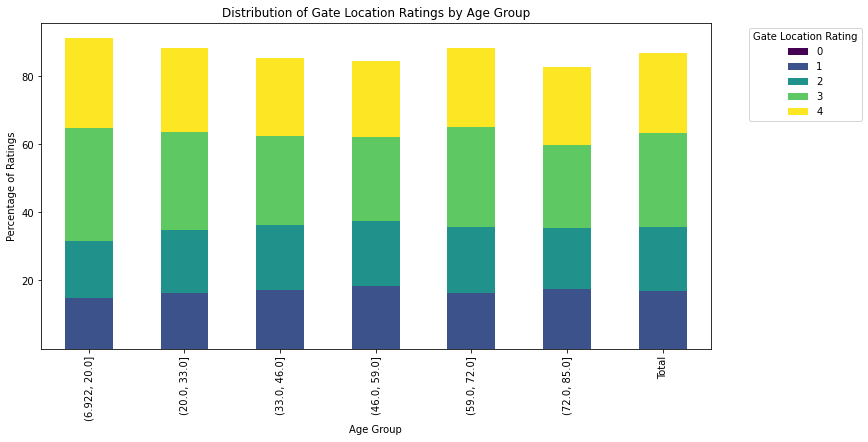

In [42]:
df['Age Group'] = pd.cut(df['Age'], bins=6)

plt.figure(figsize=(12, 6))
conditional_table = pd.crosstab(df['Age Group'], df['Gate Location'], margins=True, margins_name="Total", normalize='index') * 100

conditional_table = conditional_table.iloc[:, :-1]  # Exclude the 'Total' column from the plot

conditional_table.plot(kind='bar', stacked=True, cmap='viridis', figsize=(12, 6))
plt.title('Distribution of Gate Location Ratings by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Ratings')
plt.legend(title='Gate Location Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()